In [23]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras_ocr
import pytesseract
from PIL import Image
from pytesseract import Output

## 검증용 데이터셋 준비

In [25]:
# 이미지 불러오기
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/'
images = glob(work_dir+'*.jpg')
images.sort()
images

['/aiffel/aiffel/ocr_python/1.jpg',
 '/aiffel/aiffel/ocr_python/10.jpg',
 '/aiffel/aiffel/ocr_python/11.jpg',
 '/aiffel/aiffel/ocr_python/12.jpg',
 '/aiffel/aiffel/ocr_python/13.jpg',
 '/aiffel/aiffel/ocr_python/14.jpg',
 '/aiffel/aiffel/ocr_python/15.jpg',
 '/aiffel/aiffel/ocr_python/16.jpg',
 '/aiffel/aiffel/ocr_python/17.jpg',
 '/aiffel/aiffel/ocr_python/18.jpg',
 '/aiffel/aiffel/ocr_python/2.jpg',
 '/aiffel/aiffel/ocr_python/3.jpg',
 '/aiffel/aiffel/ocr_python/4.jpg',
 '/aiffel/aiffel/ocr_python/5.jpg',
 '/aiffel/aiffel/ocr_python/6.jpg',
 '/aiffel/aiffel/ocr_python/7.jpg',
 '/aiffel/aiffel/ocr_python/8.jpg',
 '/aiffel/aiffel/ocr_python/9.jpg']

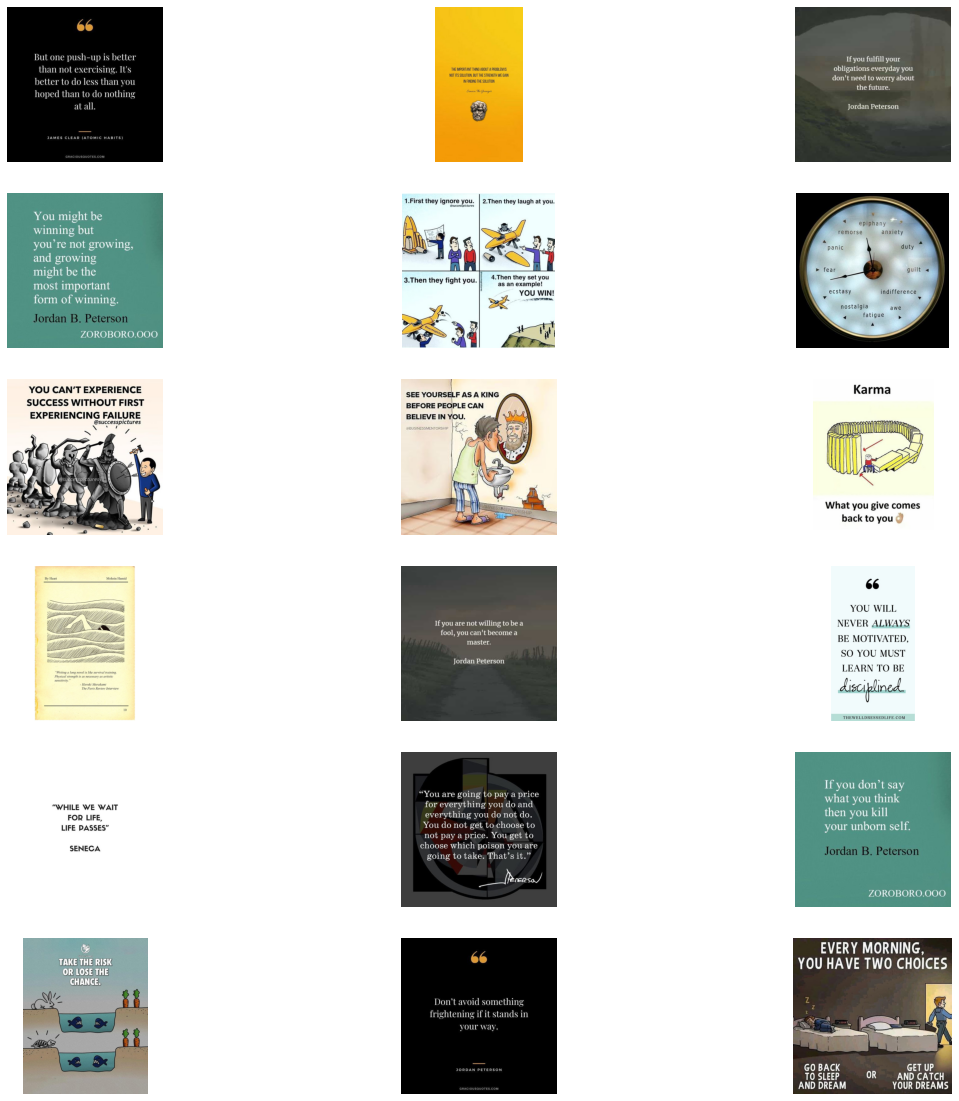

In [26]:
plt.figure(figsize=(20,20))

for idx, im in enumerate(images):
    plt.subplot(6, 3, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## keras-ocr

In [28]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [31]:
images_keras_ocr = [ keras_ocr.tools.read(im) for im in images]
prediction_groups = [pipeline.recognize([im]) for im in images]

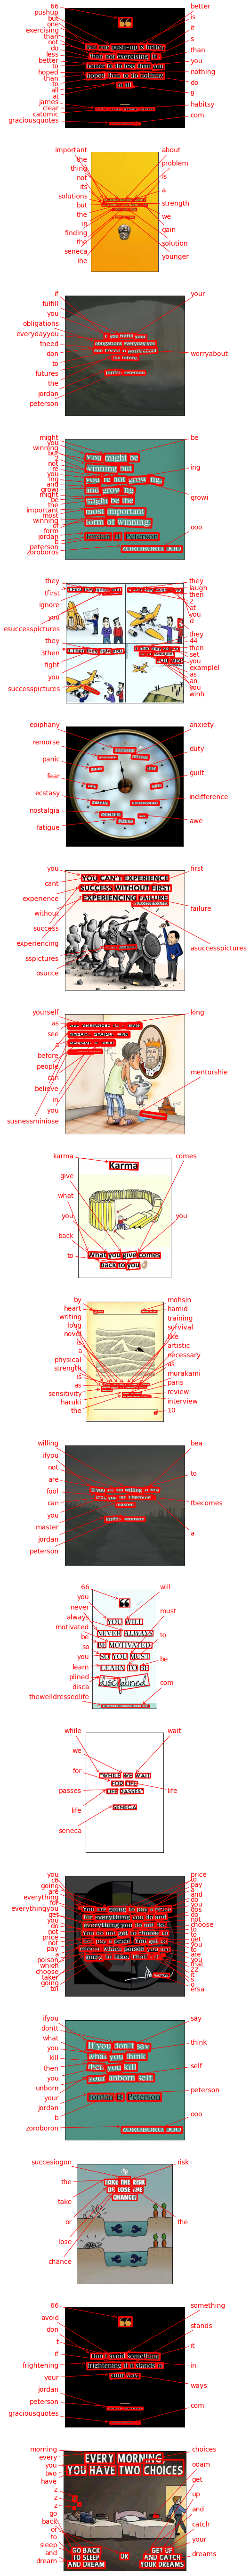

In [32]:
fig, axs = plt.subplots(nrows=len(images_keras_ocr), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras_ocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Tesseract

In [33]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# 이미지 영역 찾는 함수
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [34]:
# 이미지에서 문자 인식하는 함수
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [35]:
# 각 이미지 별 폴더 생성하여 croped 이미지 얻기
for filename, title in zip(test_filenames, image_titles):
    work_dir = (os.path.join('./tesseract', title))
    os.makedirs(work_dir, exist_ok=True)
    cropped_image_path_list = crop_word_regions(filename, work_dir)
    recognize_images(cropped_image_path_list)

./tesseract/16/0000.png
ue A

Done
./tesseract/15/0000.png
./tesseract/15/0001.png
./tesseract/15/0002.png
./tesseract/15/0003.png
./tesseract/15/0004.png
./tesseract/15/0005.png
./tesseract/15/0006.png
./tesseract/15/0007.png
./tesseract/15/0008.png
./tesseract/15/0009.png
./tesseract/15/0010.png
./tesseract/15/0011.png
YOU

CANT

EXPERIENCE

SUCCESS

WITHOUT

FIRST

EXPERIENCING

FAILURE

\

successpictures

s


Done
./tesseract/7/0000.png

Done
./tesseract/11/0000.png
./tesseract/11/0001.png
./tesseract/11/0002.png
./tesseract/11/0003.png
./tesseract/11/0004.png
./tesseract/11/0005.png
./tesseract/11/0006.png
./tesseract/11/0007.png
./tesseract/11/0008.png
./tesseract/11/0009.png
./tesseract/11/0010.png
./tesseract/11/0011.png
./tesseract/11/0012.png
./tesseract/11/0013.png
./tesseract/11/0014.png
./tesseract/11/0015.png
If you

your

obligations

Ver"

‘Fy

you

don't

need

tO

WOTTY

about

the

future.

:

|fedaersia)

Peterson

Done
./tesseract/13/

But

One

push-up

1S

poland &

than

not

exercising.

ie

piel a Keak

LO

do

ets

than

ei 8 |

hoped

ere

LO

‘ale

acolnenvetss

ail

SS...

JAMES CLEAW

(ATOMIC HABITS)

GHACIOUSQUOTES

COM

Done
./tesseract/3/0000.png
./tesseract/3/0001.png
./tesseract/3/0002.png
./tesseract/3/0003.png
./tesseract/3/0004.png
./tesseract/3/0005.png
./tesseract/3/0006.png
./tesseract/3/0007.png
./tesseract/3/0008.png
./tesseract/3/0009.png
./tesseract/3/0010.png
./tesseract/3/0011.png
./tesseract/3/0012.png
./tesseract/3/0013.png
./tesseract/3/0014.png
./tesseract/3/0015.png
66

YOU

WHIT,

NEVER

ALWAYS

BE

MOTIVATED,

SO)

YOU

MUST

1 KARN

TO

BE

dist

A plinea,

THEWELELDRESSEDLIFE.COM

Done
./tesseract/9/0000.png
./tesseract/9/0001.png
./tesseract/9/0002.png
./tesseract/9/0003.png
./tesseract/9/0004.png
./tesseract/9/0005.png
./tesseract/9/0006.png
./tesseract/9/0007.png
./tesseract/9/0008.png
./tesseract/9/0009.png
./tesseract/9/0010.png
./tess

## 회고

OCR이란 것은 처음 다뤄보기 때문에 좀 흥미로웠다. 과제를 깜빡하고 있다가 허겁지겁해서 여러가지 실험은 못해봤지만 영어뿐만 아니라 한글을 해보는 것도 좋다고 생각이 된다. 한글은 잘 인식을 못할 거 같긴 하지만 해보고 싶다. 위에 있는 글씨가 잘보이는 것 외에도 손글씨나 조금 흐릿한 것들에 대해서 성능이 어떻게 나오는지도 궁금하다. 시간이 있었다면 해봤겠지만 못한게 조금 아쉽다.